<a href="https://colab.research.google.com/github/KodakV/train_datasets/blob/master/RegressionNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor(0.0193, grad_fn=<MeanBackward0>)


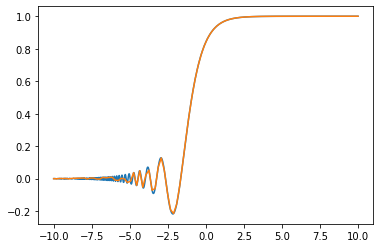

In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd 


class RegressionNet(torch.nn.Module):
  def __init__(self,nn_neurons):
    super(RegressionNet,self).__init__()
    self.fc1=torch.nn.Linear(1,nn_neurons)
    self.ac1=torch.nn.Sigmoid()
    self.fc2=torch.nn.Linear(nn_neurons,nn_neurons)
    self.ac2=torch.nn.Tanh()
    self.fc3=torch.nn.Linear(nn_neurons,1)
  def forward(self,x):
    x=self.fc1(x)
    x=self.ac1(x)
    x=self.fc2(x)
    x=self.ac2(x)
    x=self.fc3(x)
    return x

def target_func(x):
  return 2**x * torch.sin(2**-x)

def loss(y_pred,target):
  squade=(y_pred-target)**2
  return squade.mean()

def metric(y_pred,target):
  return (y_pred-target).abs().mean()

#data start

x_train=torch.linspace(-10,10,100)
y_train=target_func(x_train)
noise=torch.randn(y_train.shape)/20
y_train=y_train+noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation=torch.linspace(-10,10,100)
y_validation=target_func(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
#data end
net=RegressionNet(30)
optimizer=torch.optim.Adam(net.parameters(),lr=0.05)
for epochs_index in range(1500):
  optimizer.zero_grad()
  y_pred=net.forward(x_train)
  loss_value=loss(y_pred,y_train)
  loss_value.backward()

  optimizer.step()

print(metric(net.forward(x_validation),y_validation))

x_func=torch.linspace(-10,10,1000)
plt.plot(x_func.numpy(),target_func(x_func))
plt.plot(x_validation.numpy(),target_func(x_validation))
